In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler




Mounted at /content/drive


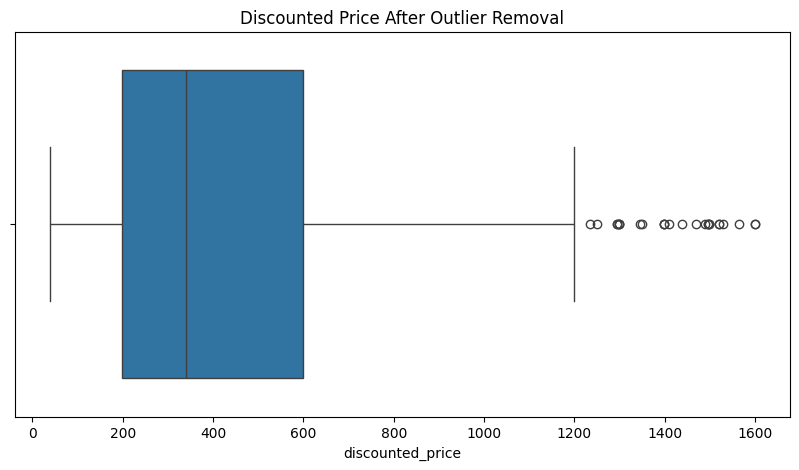

In [3]:


# Load previous
data_path = '/content/drive/My Drive/PGNO-190/preprocessed_after_IT24102631.csv'
df = pd.read_csv(data_path)
df = df[df['category'].str.contains('Computers&Accessories', na=False)].copy()


# Outlier removal
Q1 = df['discounted_price'].quantile(0.25)
Q3 = df['discounted_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['discounted_price'] < (Q1 - 1.5 * IQR)) | (df['discounted_price'] > (Q3 + 1.5 * IQR)))]

# EDA: Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['discounted_price'])
plt.title('Discounted Price After Outlier Removal')
plt.savefig('/content/eda_price_outliers.png')
plt.show()



# Save
save_path = '/content/drive/My Drive/PGNO-190/preprocessed_after_IT24102566.csv'
df.to_csv(save_path, index=False)